## Description : Sentiment Analysis of Tweets fetched from Twitter using Python

In [1]:
# Import required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", None)
plt.style.use('fivethirtyeight')


In [2]:
# Load the API keys from the login credential file
log_cred = pd.read_csv("login_credentials.csv")
consumer_key = log_cred.iloc[0, 1]
consumer_secret = log_cred.iloc[1, 1]
access_token = log_cred.iloc[2, 1]
access_token_secret = log_cred.iloc[3, 1]


In [3]:
# Create the authentication object and the API object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
username = input("Enter the user's screenname: ")
count = int(input("Enter the number of tweets to be retrieved: "))
tweets = api.user_timeline(screen_name=username, count=count,tweet_mode="extended")
# Not neccessary => Just to show that we have the tweets in the retrieved list
i = 1
for tweet in tweets[0:5]:
    print(f"{i}. {tweet.full_text}")
    i += 1

1. Joined other leaders and the people of Mathira in Nyeri County for the funeral service of Mzee Reriani. Rest In Peace. https://t.co/xvdmBXp1fr
2. May God grant the family, friends and the people of Nyeri strength and comfort to bear with the loss of James Reriani Gachagua, elder brother to Mathira MP and Kenya Kwanza Running-mate Hon. Rigathi Gachagua. https://t.co/N1w24ZvuqN
3. Stephen Jackson (UN Resident Coordinator), Maniza Zaman (UNICEF Representative Kenya), Carla Mucavi (FAO Director) and Rana Taha (Peace and Development Advisor, Resident Coordinator’s Office) were also in attendance. https://t.co/eZQbfK5cfg
4. Division of Administrative Services) and Joshua Bird (Political Affairs Officer, Office of the Director-General). https://t.co/8aktwE3Hes
5. Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Principal Security Adviser, Department of Safety and Security), Nancee Oku Bright (Chief of Staff, Office of the Director-General), Tunt

In [5]:
# Create Dataframe of tweets
df = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['Tweets'])
df.shape

(100, 1)

In [6]:
# Clean Data - Remove special characters, links, and other elements
# Create a function to clean the data
def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text) # Remove the # in #hashtag
    text = re.sub(r'RT[\s]+', '', text) # Remove RT (retweet)
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlinks

    return text

In [7]:
# Apply the function to the dataframe
df['Tweets'] = df['Tweets'].apply(clean_tweet)
# Show cleaned tweets
df.head(10)

,Tweets
0,Joined other leaders and the people of Mathira in Nyeri County for the funeral service of Mzee R...
1,"May God grant the family, friends and the people of Nyeri strength and comfort to bear with the ..."
2,"Stephen Jackson (UN Resident Coordinator), Maniza Zaman (UNICEF Representative Kenya), Carla Muc..."
3,"Division of Administrative Services) and Joshua Bird (Political Affairs Officer, Office of the D..."
4,"Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Pr..."
5,"Met the United Nation’s Country team led by Her Excellency , Director-General of the United Nati..."
6,We will do everything possible to ensure conditions conducive of UN operations in the country ar...
7,"Kenya is a passionate believer, champion and defender for multilateralism. It will continue doin..."
8,"(Kikuyu), Majimbo Kalasinga (Kabuchai), Onesmus Ngogoyo (Kajiado North MP aspirant), a host of ..."
9,"Rigathi Gachagua (running-mate), Party Leaders (ANC), _Kuria (CCK), (Ford-Kenya), Kajiado Gube..."


In [8]:
# Create subjectivity and polarity then save to dataframe in new columns
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)
df.head(10)

,Tweets,Subjectivity,Polarity
0,Joined other leaders and the people of Mathira in Nyeri County for the funeral service of Mzee R...,0.375000,-0.125000
1,"May God grant the family, friends and the people of Nyeri strength and comfort to bear with the ...",0.000000,0.000000
2,"Stephen Jackson (UN Resident Coordinator), Maniza Zaman (UNICEF Representative Kenya), Carla Muc...",0.000000,0.000000
3,"Division of Administrative Services) and Joshua Bird (Political Affairs Officer, Office of the D...",0.100000,0.000000
4,"Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Pr...",0.457143,0.352381
5,"Met the United Nation’s Country team led by Her Excellency , Director-General of the United Nati...",0.566667,0.366667
6,We will do everything possible to ensure conditions conducive of UN operations in the country ar...,1.000000,0.000000
7,"Kenya is a passionate believer, champion and defender for multilateralism. It will continue doin...",0.425000,-0.025000
8,"(Kikuyu), Majimbo Kalasinga (Kabuchai), Onesmus Ngogoyo (Kajiado North MP aspirant), a host of ...",0.000000,0.000000
9,"Rigathi Gachagua (running-mate), Party Leaders (ANC), _Kuria (CCK), (Ford-Kenya), Kajiado Gube...",0.000000,0.000000


(-0.5, 399.5, 199.5, -0.5)

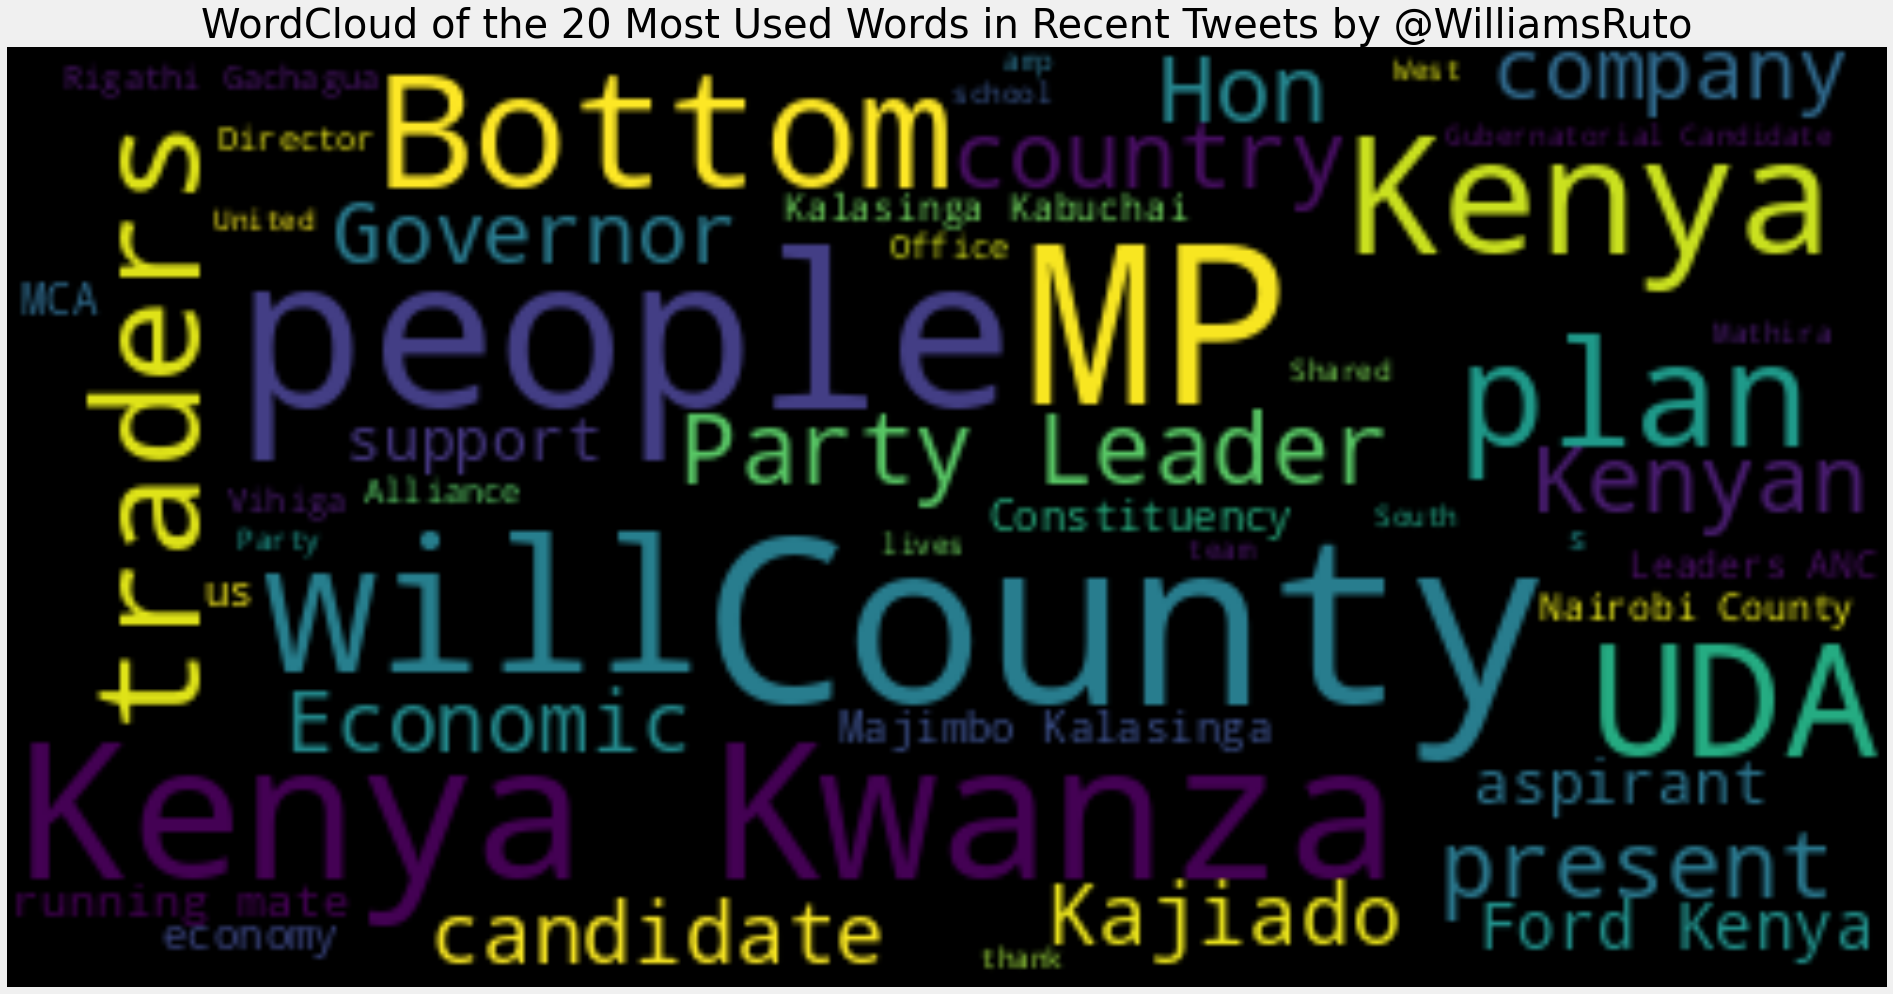

In [9]:
# Wordcloud of the top 100 most used words
all_words = ' '.join([text for text in df['Tweets']])

fig, ax = plt.subplots(figsize=(30, 40))
word_cloud = WordCloud(max_font_size=50, max_words=50, random_state=21).generate(all_words)

ax.imshow(word_cloud, interpolation='bilinear')
ax.set_title(f'WordCloud of the 20 Most Used Words in Recent Tweets by @{username}', fontsize=40)
ax.axis("off")

In [10]:
# Compute negative, neutral, positive analysis of the tweets
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score== 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(get_analysis)


Text(0.5, 1.0, 'Analysis of Tweets by @WilliamsRuto')

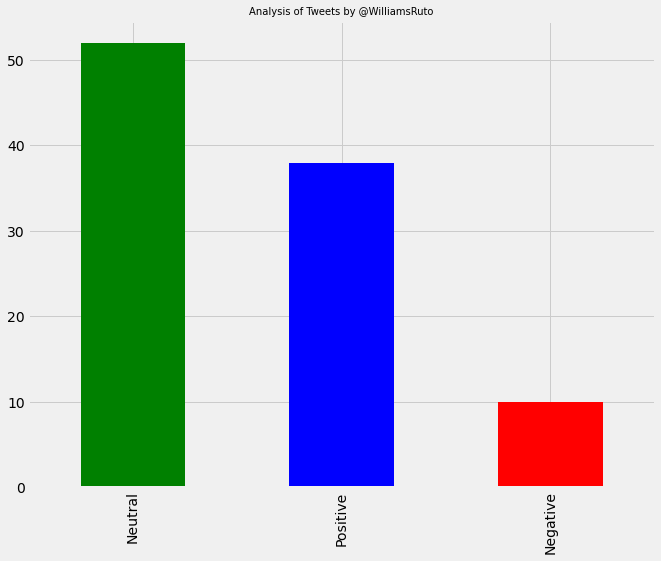

In [19]:
# Plotting the polarity of the tweets
ax = df['Analysis'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], figsize=(10, 8))
ax.set_title(f'Analysis of Tweets by @{username}', fontsize=10)

In [20]:
def get_subjectivity_analysis(score):
    if score < 0.5:
        return 'Objective'
    else:
        return 'Subjective'

df['SUBJECTIVITY_ANALYSIS'] = df['Subjectivity'].apply(get_subjectivity_analysis)
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis,SUBJECTIVITY_ANALYSIS
0,Joined other leaders and the people of Mathira in Nyeri County for the funeral service of Mzee R...,0.375000,-0.125000,Negative,Objective
1,"May God grant the family, friends and the people of Nyeri strength and comfort to bear with the ...",0.000000,0.000000,Neutral,Objective
2,"Stephen Jackson (UN Resident Coordinator), Maniza Zaman (UNICEF Representative Kenya), Carla Muc...",0.000000,0.000000,Neutral,Objective
3,"Division of Administrative Services) and Joshua Bird (Political Affairs Officer, Office of the D...",0.100000,0.000000,Neutral,Objective
4,"Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Pr...",0.457143,0.352381,Positive,Objective
5,"Met the United Nation’s Country team led by Her Excellency , Director-General of the United Nati...",0.566667,0.366667,Positive,Subjective
6,We will do everything possible to ensure conditions conducive of UN operations in the country ar...,1.000000,0.000000,Neutral,Subjective
7,"Kenya is a passionate believer, champion and defender for multilateralism. It will continue doin...",0.425000,-0.025000,Negative,Objective
8,"(Kikuyu), Majimbo Kalasinga (Kabuchai), Onesmus Ngogoyo (Kajiado North MP aspirant), a host of ...",0.000000,0.000000,Neutral,Objective
9,"Rigathi Gachagua (running-mate), Party Leaders (ANC), _Kuria (CCK), (Ford-Kenya), Kajiado Gube...",0.000000,0.000000,Neutral,Objective


Text(0.5, 1.0, 'Subjectivity Analysis of Tweets by @WilliamsRuto')

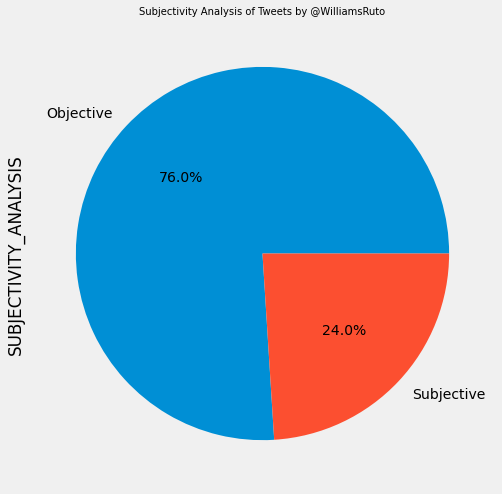

In [13]:
# Plotting the polarity of the tweets
ax = df['SUBJECTIVITY_ANALYSIS'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))
ax.set_title(f'Subjectivity Analysis of Tweets by @{username}', fontsize=10)

In [14]:
# Print all of the positive tweets
positive_tweets = df[df['Analysis'] == 'Positive']
positive_tweets_count = positive_tweets['Tweets'].count()
print(positive_tweets['Tweets'])



4     Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Pr...
5     Met the United Nation’s Country team led by Her Excellency , Director-General of the United Nati...
12    The contest in the August 9 General Election is now framed. It is those keen to change the const...
15    Shared our Bottom-Up Economic Plan message with the people and traders of Ongata Rongai Town, Ka...
18    I am proud to unveil a true partner in this journey, a man who has supported this cause and will...
19    Hon Gachagua, the Mathira MP, is an astute debater, forthright with prodigious persuasive abilit...
26            A vote for Kenya Kwanza will be a vote to create more economic opportunities for everyone. 
27    The August 9 General Election presents a far-reaching moment for Kenyans to decide their destiny...
32    The Kenya Kwanza administration will give a priority to the security of Marsabit County, and eve...
33    In the company of ANC Party Leader , UDA

In [15]:
# Print top 10 the negative tweets
negative_tweets = df[df['Analysis'] == 'Negative']
negative_tweets_count = negative_tweets['Tweets'].count()
print(positive_tweets['Tweets'])

4     Present were Chris Kirkcaldy (Director, Division of Administrative Services), Peter Marshall (Pr...
5     Met the United Nation’s Country team led by Her Excellency , Director-General of the United Nati...
12    The contest in the August 9 General Election is now framed. It is those keen to change the const...
15    Shared our Bottom-Up Economic Plan message with the people and traders of Ongata Rongai Town, Ka...
18    I am proud to unveil a true partner in this journey, a man who has supported this cause and will...
19    Hon Gachagua, the Mathira MP, is an astute debater, forthright with prodigious persuasive abilit...
26            A vote for Kenya Kwanza will be a vote to create more economic opportunities for everyone. 
27    The August 9 General Election presents a far-reaching moment for Kenyans to decide their destiny...
32    The Kenya Kwanza administration will give a priority to the security of Marsabit County, and eve...
33    In the company of ANC Party Leader , UDA

In [16]:
# Print top the neutral tweets
neutral_tweets = df[df['Analysis'] == 'Neutral']
neutral_tweets_count = neutral_tweets['Tweets'].count()
print(neutral_tweets['Tweets'])

1     May God grant the family, friends and the people of Nyeri strength and comfort to bear with the ...
2     Stephen Jackson (UN Resident Coordinator), Maniza Zaman (UNICEF Representative Kenya), Carla Muc...
3     Division of Administrative Services) and Joshua Bird (Political Affairs Officer, Office of the D...
6     We will do everything possible to ensure conditions conducive of UN operations in the country ar...
8      (Kikuyu), Majimbo Kalasinga (Kabuchai), Onesmus Ngogoyo (Kajiado North MP aspirant), a host of ...
9     Rigathi Gachagua (running-mate), Party Leaders  (ANC), _Kuria (CCK),  (Ford-Kenya), Kajiado Gube...
10    Thanked the people of Kiserian, Matasia, Ngong’ and Embulbul in Kajiado County for agreeing to s...
11                                                                            The Bottom-Up is our plan. 
13    George Sunkuiya (Kajiado West),  (Kikuyu), Majimbo Kalasinga (Kabuchai), George Mugo (Kajiado No...
14    We were accompanied by Rigathi Gachagua 

Text(0.5, 1.0, 'Number of Positive, Negative and Neutrral Tweets by @WilliamsRuto')

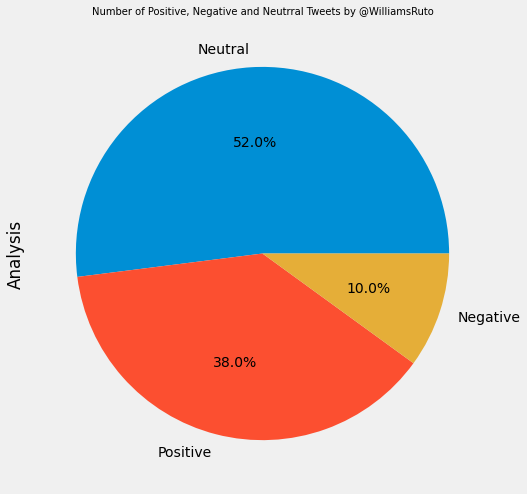

In [17]:
# Pie chart of the polarity of the tweets
ax = df['Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))
ax.set_title(f'% of Positive, Negative and Neutrral Tweets by @{username}', fontsize=10)


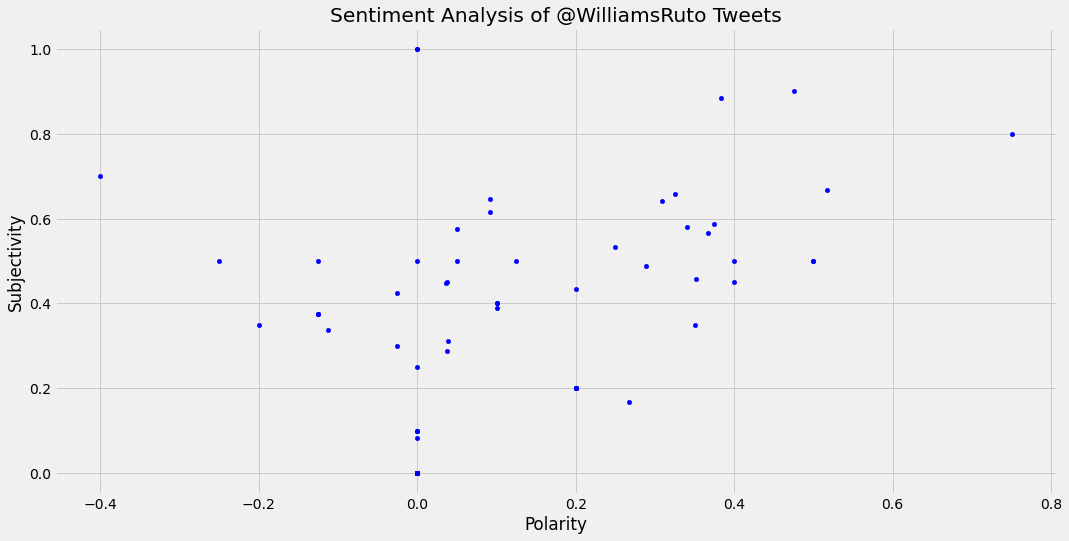

In [18]:
# Plot polarity and subjectivity of the tweets
ax = df.plot(kind='scatter', x='Polarity', y='Subjectivity', color='blue', figsize=(16,8))
ax.title.set_text(f'Sentiment Analysis of @{username} Tweets')